🔍 DEBUG: Checking why bottom-right graph is missing
Realtime data info:
Shape: (29, 9)
Columns: ['region', '_region_id', '_west', '_east', '_south', '_north', '_description', 'current_speed', '_last_updt']

📊 Speed data analysis:
Non-null speed values: 29
Speed range: 0.0 to 32.73

🚗 Speed categories created: 29
Category counts:
current_speed
Moderate     23
Slow          5
Very Slow     0
Fast          0
Name: count, dtype: int64

1. Creating Top Congested Streets graph...
2. Creating Average Speed by Region graph...
3. Creating Congestion by Direction graph...
4. Creating Speed Distribution Categories graph...
Speed Distribution Data:
  Moderate
(25-35 mph): 79.3%
  Slow
(15-25 mph): 17.2%
  Very Slow
(0-15 mph): 0.0%
  Fast
(35+ mph): 0.0%


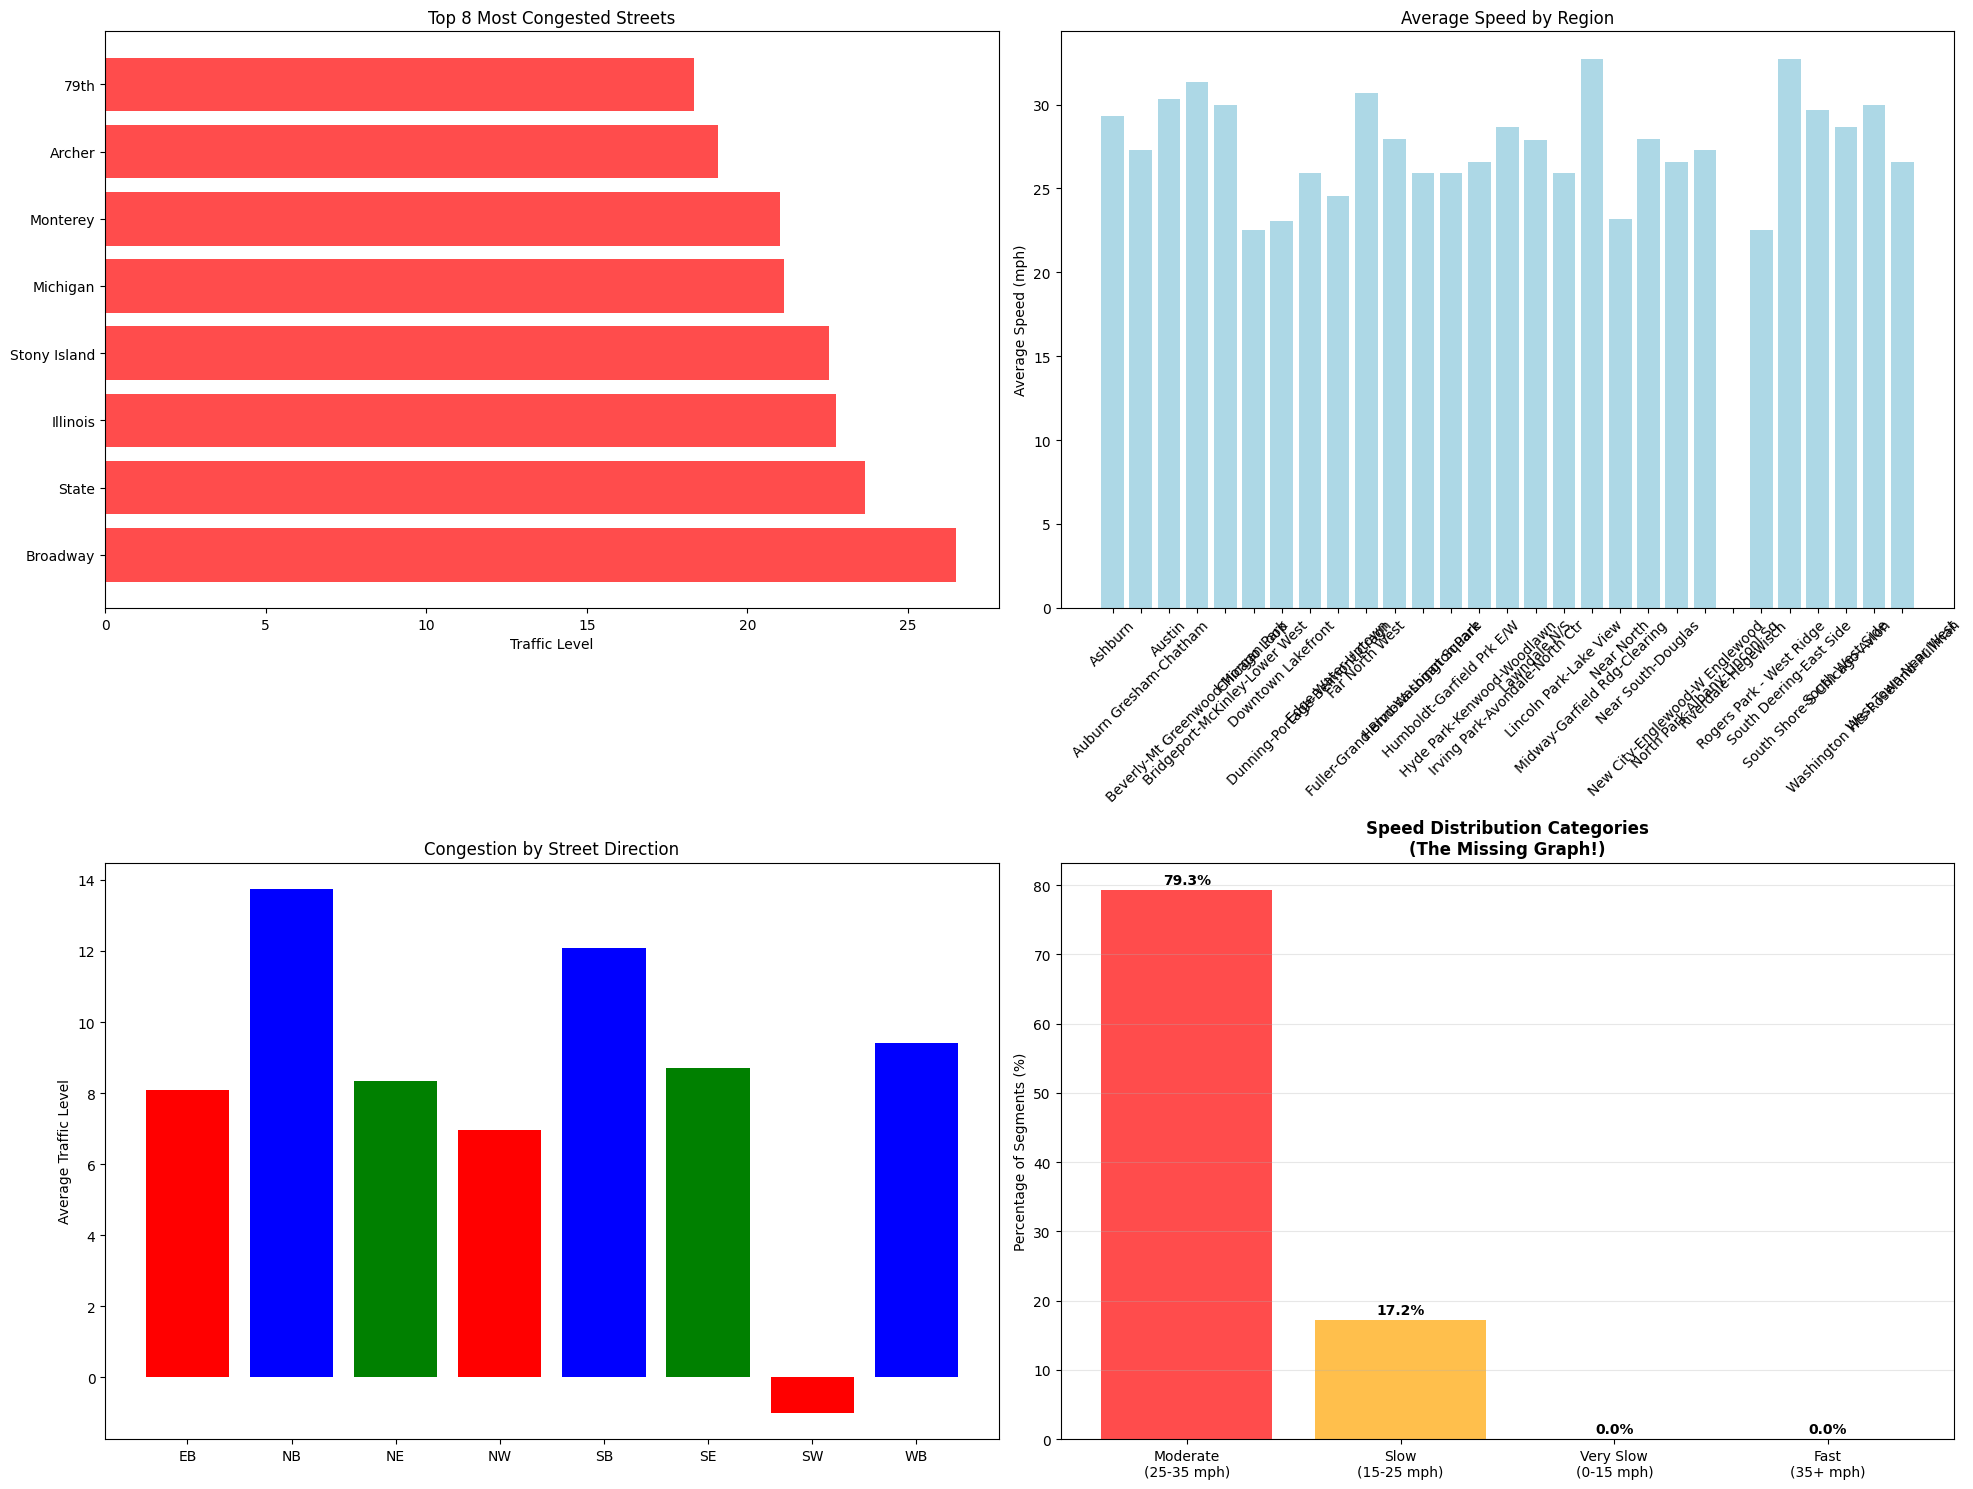


✅ All four graphs should now be visible!
   Top-Left: Congested Streets
   Top-Right: Regional Speeds
   Bottom-Left: Direction Analysis
   Bottom-Right: Speed Distribution Categories


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your data
congestion_df = pd.read_csv('../data/processed/chicago_congestion.csv')
realtime_df = pd.read_csv('../data/processed/chicago_realtime_traffic.csv')

print("🔍 DEBUG: Checking why bottom-right graph is missing")
print("=" * 50)

# Check if speed distribution data exists
print("Realtime data info:")
print(f"Shape: {realtime_df.shape}")
print(f"Columns: {realtime_df.columns.tolist()}")

if 'current_speed' in realtime_df.columns:
    print(f"\n📊 Speed data analysis:")
    print(f"Non-null speed values: {realtime_df['current_speed'].notna().sum()}")
    print(f"Speed range: {realtime_df['current_speed'].min()} to {realtime_df['current_speed'].max()}")
    
    # Check if we can create the speed categories
    speed_categories = pd.cut(
        realtime_df['current_speed'].dropna(),
        bins=[0, 15, 25, 35, 100],
        labels=['Very Slow', 'Slow', 'Moderate', 'Fast']
    )
    
    print(f"\n🚗 Speed categories created: {len(speed_categories)}")
    print("Category counts:")
    print(speed_categories.value_counts())
    
else:
    print("❌ No 'current_speed' column found!")

# Let's create the complete 2x2 grid with all four graphs
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Graph 1: Top Congested Streets (Top-Left)
print("\n1. Creating Top Congested Streets graph...")
top_streets = congestion_df.groupby('street')['_traffic'].mean().nlargest(8)
axes[0,0].barh(range(len(top_streets)), top_streets.values, color='red', alpha=0.7)
axes[0,0].set_yticks(range(len(top_streets)))
axes[0,0].set_yticklabels([str(s)[:20] + '...' if len(str(s)) > 20 else str(s) for s in top_streets.index])
axes[0,0].set_xlabel('Traffic Level')
axes[0,0].set_title('Top 8 Most Congested Streets')

# Graph 2: Average Speed by Region (Top-Right) 
print("2. Creating Average Speed by Region graph...")
if 'region' in realtime_df.columns and 'current_speed' in realtime_df.columns:
    region_speeds = realtime_df.groupby('region')['current_speed'].mean()
    axes[0,1].bar(region_speeds.index, region_speeds.values, color='lightblue')
    axes[0,1].set_ylabel('Average Speed (mph)')
    axes[0,1].set_title('Average Speed by Region')
    axes[0,1].tick_params(axis='x', rotation=45)
else:
    axes[0,1].text(0.5, 0.5, 'No region/speed data', ha='center', va='center')
    axes[0,1].set_title('Average Speed by Region - No Data')

# Graph 3: Congestion by Direction (Bottom-Left)
print("3. Creating Congestion by Direction graph...")
if '_direction' in congestion_df.columns:
    direction_congestion = congestion_df.groupby('_direction')['_traffic'].mean()
    axes[1,0].bar(direction_congestion.index, direction_congestion.values, color=['red', 'blue', 'green'])
    axes[1,0].set_ylabel('Average Traffic Level')
    axes[1,0].set_title('Congestion by Street Direction')
else:
    axes[1,0].text(0.5, 0.5, 'No direction data', ha='center', va='center')
    axes[1,0].set_title('Congestion by Direction - No Data')

# Graph 4: Speed Distribution Categories (Bottom-Right) - THE MISSING ONE!
print("4. Creating Speed Distribution Categories graph...")
if 'current_speed' in realtime_df.columns and realtime_df['current_speed'].notna().sum() > 0:
    # Create speed categories
    speeds_clean = realtime_df['current_speed'].dropna()
    speed_categories = pd.cut(
        speeds_clean,
        bins=[0, 15, 25, 35, 100],
        labels=['Very Slow\n(0-15 mph)', 'Slow\n(15-25 mph)', 'Moderate\n(25-35 mph)', 'Fast\n(35+ mph)']
    )
    
    category_counts = speed_categories.value_counts()
    percentages = (category_counts / len(speeds_clean) * 100).round(1)
    
    print(f"Speed Distribution Data:")
    for category, percent in percentages.items():
        print(f"  {category}: {percent}%")
    
    # Plot the graph
    colors = ['red', 'orange', 'yellow', 'green']
    bars = axes[1,1].bar(percentages.index, percentages.values, color=colors, alpha=0.7)
    axes[1,1].set_ylabel('Percentage of Segments (%)')
    axes[1,1].set_title('Speed Distribution Categories\n(The Missing Graph!)', fontweight='bold')
    axes[1,1].grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for bar, percent in zip(bars, percentages.values):
        height = bar.get_height()
        axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                      f'{percent}%', ha='center', va='bottom', fontweight='bold')
    
else:
    axes[1,1].text(0.5, 0.5, 'No speed data available\nfor distribution analysis', 
                   ha='center', va='center', fontsize=12)
    axes[1,1].set_title('Speed Distribution - No Data')

plt.tight_layout()
plt.savefig('../outputs/figures/debug_all_four_graphs.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ All four graphs should now be visible!")
print("   Top-Left: Congested Streets")
print("   Top-Right: Regional Speeds") 
print("   Bottom-Left: Direction Analysis")
print("   Bottom-Right: Speed Distribution Categories")